In [ ]:
import pandas as pd
import numpy as np

#### 1. Scegliere i dati
nomefile = './marziani.csv'
data = pd.read_csv(nomefile)
print(data.head())                  # per farsi un'idea del contenuto
print(">>colonne: ", data.columns)  # per vedere le intestazioni di colonna
print(">>tipi\n",data.dtypes)       # per vedere i tipi

In [16]:
#### 2. PREPARAZIONE DEI DATI
### ANALISI DEI DATI
print(">>describe Specie")
print(data.specie.unique())        # quali sono le specie
print(data['specie'].describe())   # quanti campioni ci sono

###
for specie in data.specie.unique():     # per ogni specie
    dati = data[data['specie'] == specie]
    print('>>', specie)
    for x in data.columns:
        print(dati[x].describe() )      # per avere statistiche sui dati 

>>describe Specie
['Elon' 'Musk']
count     2000
unique       2
top       Musk
freq      1000
Name: specie, dtype: object
>> Elon
count     1000
unique       1
top       Elon
freq      1000
Name: specie, dtype: object
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75% 

In [17]:
### RENDIAMO NUMERICHE LE LABEL
colori = np.sort(data['colore'].dropna().unique())  # colori in ordine alfabetico
print(colori)

d = data.copy()        # facciamo una copia dei dati originali

for k in range (len(colori)):           # sostituiamo ogni colore con l'indice
    d.loc[:,'colore'].replace(colori[k], k, inplace = True)
print(d.head())

['blu' 'rosso' 'viola']
  specie  colore  n_arti  peso  altezza  larghezza
0   Elon     2.0    20.0  3.87    14.77      73.22
1   Elon     2.0    27.0  3.15    28.19      88.44
2   Elon     2.0    25.0  4.35    12.05      76.74
3   Elon     0.0    20.0  3.76     9.90      81.37
4   Elon     0.0    28.0  2.86    19.87      84.65


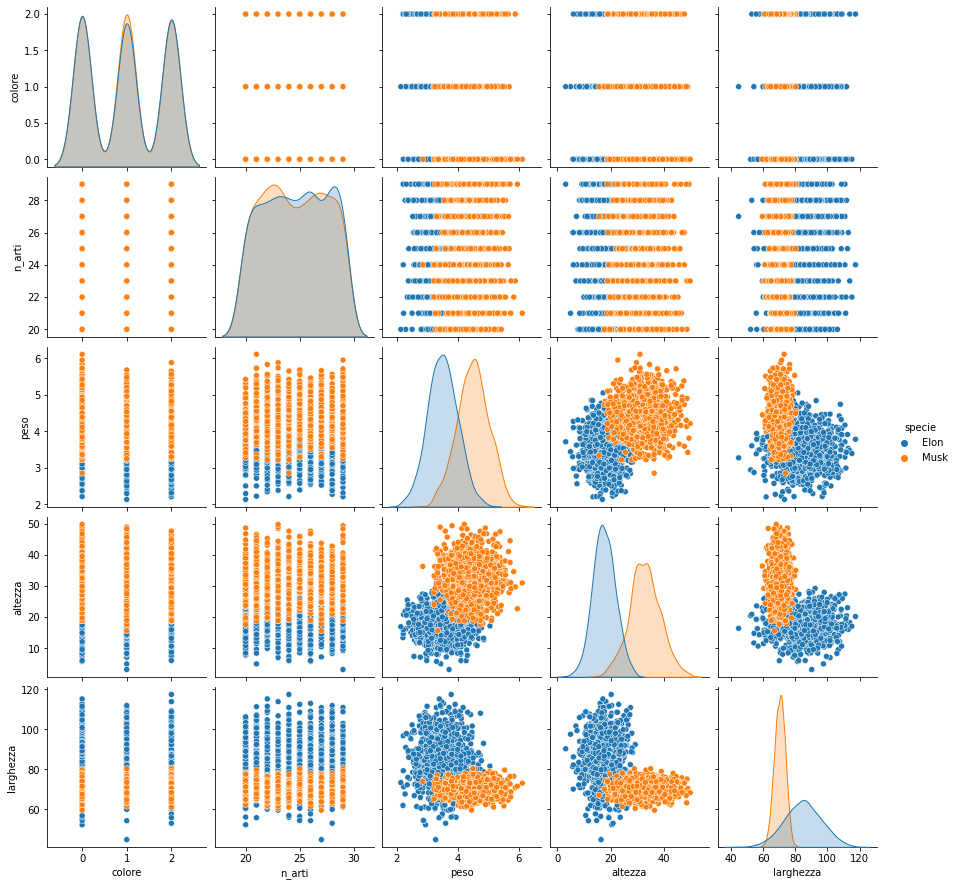

In [18]:
### ANALISI PER SCELTA FEATURE
import seaborn as sns   # conda install seaborn

sns.pairplot(d, hue='specie', dropna=True) 

In [19]:
### ELIMINAZIONE DATI MANCANTI
# Colonne con dati mancanti
cols_with_missing = [col for col in d.columns if d[col].isnull().sum()]
print(cols_with_missing)
# caratteristiche scelte per la classificazione
cols_selected = ['peso','altezza', 'larghezza']
# si eliminano le righe con dati mancanti solo nelle colonne selezionate
d = data.dropna(axis='index', subset = cols_selected) 
print(d.shape)                
# Colonne rimanenti con dati mancanti
print([col for col in d.columns if d[col].isnull().sum()])

['colore', 'n_arti', 'altezza', 'larghezza']
(1992, 6)
['colore', 'n_arti']


In [20]:
### INDIVIDUAZIONE X E y
X = d[['peso','altezza','larghezza']]
y = d['specie']
print(X.head())
print(y.head())

#### 3. SUDDIVISIONE TRAIN E TEST
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                    train_size=0.7, random_state=0)

print(X_train.head())
print("Numero di campioni in X: ",X_train.shape[0])    
print(y_train.value_counts())       # quanti valori per ogni specie
print(y_train.head())

   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65
0    Elon
1    Elon
2    Elon
3    Elon
4    Elon
Name: specie, dtype: object
      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47
Numero di campioni in X:  1394
Musk    710
Elon    684
Name: specie, dtype: int64
1853    Musk
486     Elon
846     Elon
376     Elon
580     Elon
Name: specie, dtype: object


In [ ]:
### STANDARIZZAZIONE
pd.options.display.float_format = '{:.3f}'.format #visualizza i dati con solo 3 decimali

m = X_train.mean()
print(f">>Media: \n{m}")
s = X_train.std()
print(f">>Deviazione standard: \n{s}")

X_train_std = ((X_train-m)/s)     # normalizziamo
print(f">>X train Normalizzato \n {X_train_std.describe()}")

In [ ]:
# VERIFICA 
import seaborn as sns  
import matplotlib.pyplot as plt

for col in X_train.columns:
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,2)) #condividi asse y 
    fig.suptitle(col,y=0)  #titolo posizionato in basso
    # titolo dei due grafici affiancati
    axes[0].set_title("dati iniziali"); axes[1].set_title("dati normalizzati") 
    # eliminiamo tutte le altre etichette
    axes[0].set_xlabel(' ');  axes[1].set_xlabel(' ') 
    # disegniamo gli istrogrammi e la curva KDE = Kernel Density Estimation
    sns.histplot(ax=axes[0], x=X_train[col], kde=True) 
    sns.histplot(ax=axes[1], x=X_train_std[col], kde=True)


In [ ]:
## NORMALIZZAZIONE DEL TEST SET
X_test_std = ((X_test-m)/s)     # normalizziamo
print(f">>X test Normalizzato \n {X_test_std.describe()}")

pd.options.display.float_format = None # ripristina la visualizzazione di default